# <b>contour</b>

This section describes various options available for contour plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/contour.html#contour

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

Read some fake contour data:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_contour.csv')
df.head()

,Experiment,Batch,X,Y,Value
0,Control,101,1,-4,3.5
1,Control,101,1,-2,2.1
2,Control,101,1,0,3.3
3,Control,101,1,2,3.2
4,Control,101,1,4,4.0


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic contour

A basic contour plot without fill can be generated using keyword `filled=False`.  We can disable a colorbar using keyword `cbar=False`:

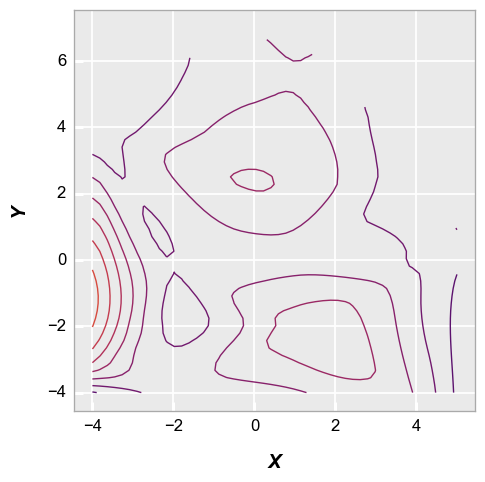

In [4]:
fcp.contour(df, x='X', y='Y', z='Value', filled=False, cbar=False)

### Contour lines

We can control the style and number of the contour lines as shown below to get a better result:

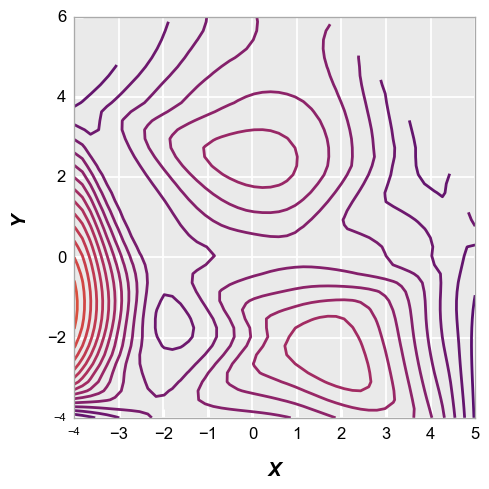

In [5]:
fcp.contour(df, x='X', y='Y', z='Value', filled=False, cbar=False, levels=40, contour_width=2,
            xmin=-4, xmax=5, ymin=-4, ymax=6)

### Contour points

The x and y points used to make the contour can also be overlaid on the contour lines, using keyword `show_points=True`.  Markers can be styled according to typical keywords for the markers `Element` class:

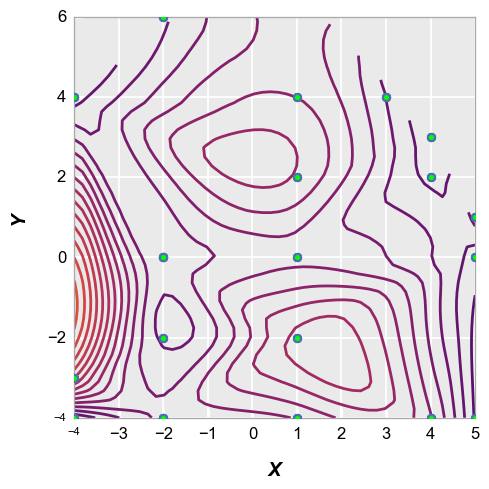

In [6]:
fcp.contour(df, x='X', y='Y', z='Value', filled=False, cbar=False, levels=40, contour_width=2,
            xmin=-4, xmax=5, ymin=-4, ymax=6, show_points=True, marker_size=26, marker_fill_color='#00FF00')

### Grouping

We can also use other columns in the `DataFrame` to easily group the data into multiple contour subplots:

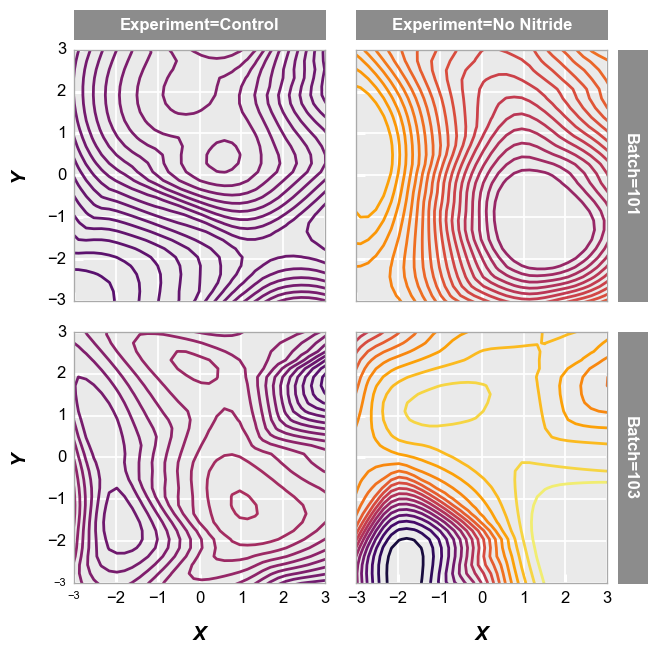

In [7]:
fcp.contour(df, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=False,
            cbar=False, xmin=-3, xmax=3, ymin=-3, ymax=3, ax_size=[250,250], contour_width=2,
            label_rc_font_size=12)

## Filled contour

Next we can fill the contours using the keyword `filled` or `contour_filled`.  We can also add a colorbar to show the range of z-values in the plot using the keyword `cmap=True`:

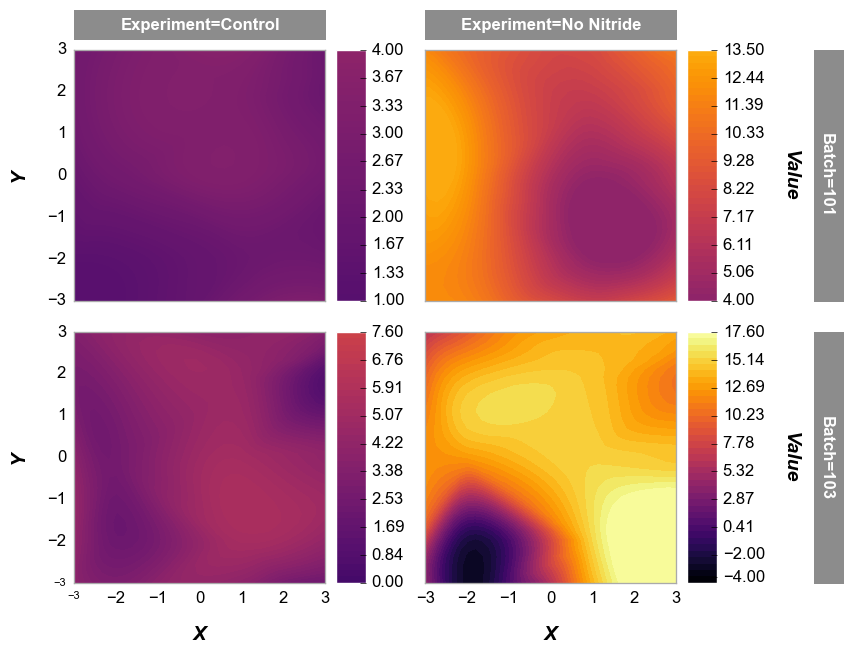

In [8]:
fcp.contour(df, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=True,
            cbar=True, xmin=-3, xmax=3, ymin=-3, ymax=3, ax_size=[250,250], 
            label_rc_font_size=12, levels=40)

And with a fixed z-range:

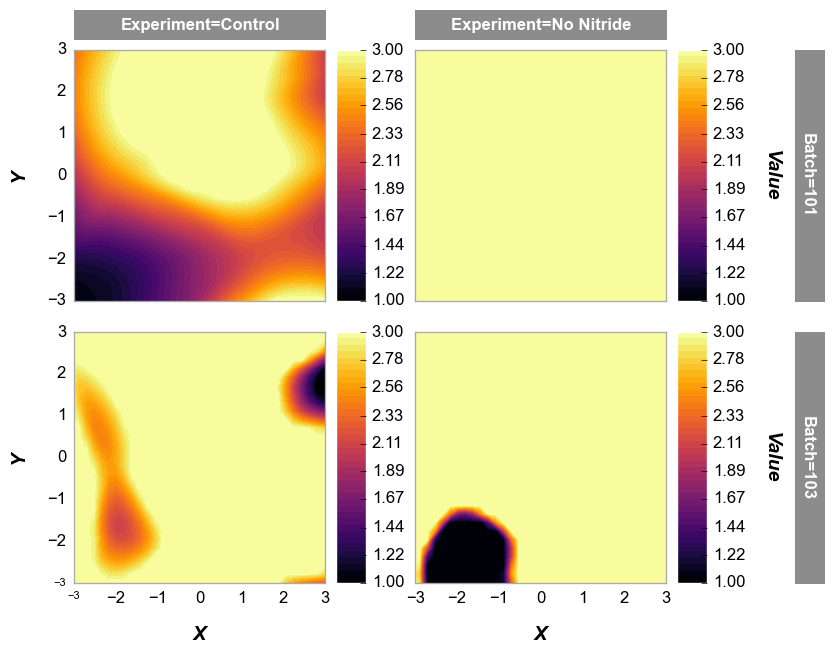

In [9]:
fcp.contour(df, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=True,
            cbar=True, xmin=-3, xmax=3, ymin=-3, ymax=3, ax_size=[250,250], 
            label_rc_font_size=12, zmin=1, zmax=3, levels=40)

## Data interpolation

The x, y, and z data provided in the `DataFrame` needs to be transformed into a grid for the contour.  This is done using `numpy` and `scipy` modules:

     xi = np.linspace(min(xx), max(xx))
     yi = np.linspace(min(yy), max(yy)) 
     zi = scipy.interpolate.griddata((xx, yy), zz, (xi[None, :], yi[:, None]), method=method)
     
where the method is supplied using the keyword `interp`.  Any standard `scipy` argument is allowed but a default of "cubic" is used.  Observe the differences between "cubic" and "linear" below:

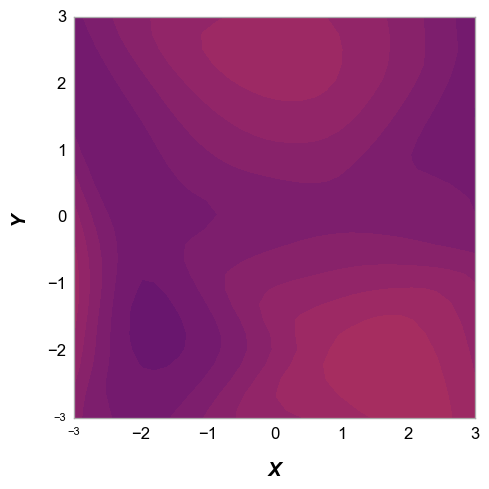

In [10]:
fcp.contour(df, x='X', y='Y', z='Value', cbar=False, levels=40, contour_width=2,
            xmin=-3, xmax=3, ymin=-3, ymax=3, interp='cubic')

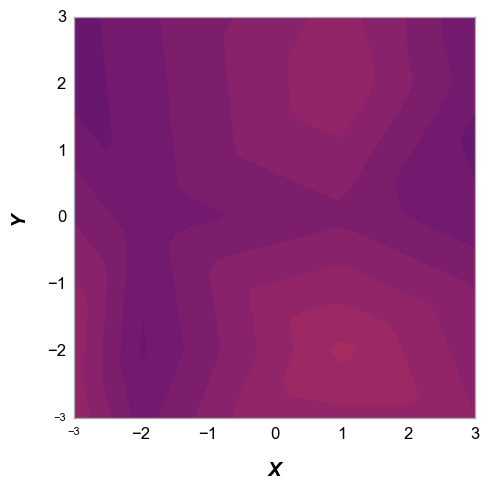

In [11]:
fcp.contour(df, x='X', y='Y', z='Value', cbar=False, levels=40, contour_width=2,
            xmin=-3, xmax=3, ymin=-3, ymax=3, interp='linear')